In [1]:
import pandas as pd
import numpy as np

# Load your data into a pandas DataFrame
data = pd.read_excel('MMM_data.xlsx')

# Clean and transform your data as necessary (handle missing values, format dates, etc.)
data['DATE'] = pd.to_datetime(data['DATE'])

# Create dummy variables for categorical variables if needed
# data = pd.get_dummies(data, columns=['Campaign'])

# Example: Compute lagged variables for time series data
# data['Sales_Lag1'] = data['Sales'].shift(1)

In [2]:
data.head()

,DATE,DEMAND,Consumer Price Index (CPI),Consumer Confidence Index(CCI),Producer Price Index (PPI),Unit Price ($),POS/ Supply Data,SALES ($),SMS,Newspaper ads,Radio,TV,Internet,GRP (NewPaper ads),GRP(SMS),GRP(Radio,GRP(Internet),GRP(TV)
0,2015-01-01,4005,101.5,103.6,102.1,361.62,4241,1533630.42,42.6279,11.224485,79.3605,1176.2093,3298.952,390.3756,0.0000,891.5664,1540.4294,7307.3182
1,2015-01-02,4242,101.5,103.6,102.1,361.62,4342,1570154.04,49.2210,10.995497,86.8139,1151.5217,2838.129,462.8413,17.6288,173.3708,394.7120,1420.9545
2,2015-01-03,2543,101.5,103.6,102.1,361.62,2859,1033871.58,46.2566,11.370578,84.5387,1162.7381,2744.632,676.4964,27.2540,165.5566,493.4066,1356.9091
3,2015-01-04,2555,101.5,103.6,102.1,361.62,2841,1027362.42,42.2917,11.085268,79.8047,1147.7163,4937.903,694.4416,54.2678,149.4013,543.3876,1224.5000
4,2015-01-05,2261,101.5,103.6,102.1,361.62,2556,924300.72,38.9348,10.688346,72.2086,1090.9399,2590.900,646.6664,61.0317,108.0510,280.2315,885.5909


In [3]:
def remove_outliers(data, columns, threshold=5):
    data_no_outliers = data.copy()
    for col in columns:
        z_scores = np.abs((data[col] - data[col].mean()) / data[col].std())
        data_no_outliers = data_no_outliers.loc[z_scores < threshold]
    return data_no_outliers

In [4]:
columns_to_clean = ['SMS', 'Newspaper ads', 'Radio', 'TV', 'Internet']
cleaned_data = remove_outliers(data, columns_to_clean)

In [5]:
print("Original DataFrame:")
print(data)
print("\nDataFrame with outliers removed:")
print(cleaned_data)

Original DataFrame:
          DATE  DEMAND   Consumer Price Index (CPI)  \
0   2015-01-01     4005                       101.5   
1   2015-01-02     4242                       101.5   
2   2015-01-03     2543                       101.5   
3   2015-01-04     2555                       101.5   
4   2015-01-05     2261                       101.5   
..         ...      ...                         ...   
782 2017-02-21     7312                       101.4   
783 2017-02-22     6456                       101.4   
784 2017-02-23     6060                       101.4   
785 2017-02-24     5980                       101.4   
786 2017-02-25     5609                       101.4   

     Consumer Confidence Index(CCI)  Producer Price Index (PPI)  \
0                             103.6                       102.1   
1                             103.6                       102.1   
2                             103.6                       102.1   
3                             103.6                

In [6]:
import statsmodels.api as sm

# Define your independent variables (X) and dependent variable (y)
X = cleaned_data[['SMS', 'Newspaper ads', 'Radio', 'TV', 'Internet']]
y = cleaned_data['SALES ($)']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()

# Print a summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SALES ($)   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.3486
Date:                Sun, 23 Jun 2024   Prob (F-statistic):              0.883
Time:                        22:22:20   Log-Likelihood:                -11873.
No. Observations:                 787   AIC:                         2.376e+04
Df Residuals:                     781   BIC:                         2.379e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.762e+06   8.17e+05      2.156

In [7]:
#Coefficient Magnitudes: The coefficients indicate the impact of each marketing tactic on sales. 
#Focus on tactics with higher coefficients (and statistically significant) as they have a stronger influence on sales.
#Example: If SMS has a coefficient of 7286 and TV have a coefficient of 232, it suggests that SMS have a larger impact on sales per unit spent compared to TV.

R-squared: 0.0022266170687001985


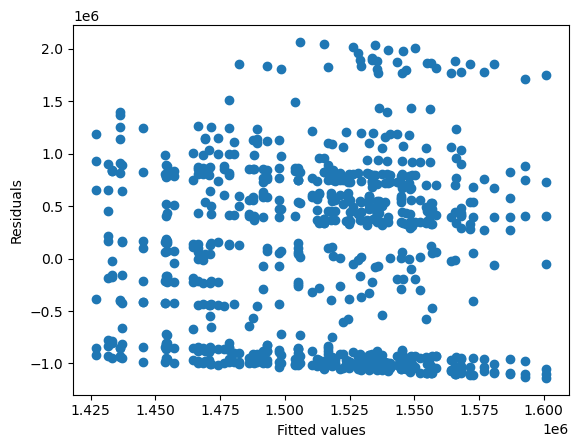

In [8]:
# Calculate R-squared
#the standards for a good R-squared reading can be much higher, such as 0.9 or above. 
#In finance, an R-squared above 0.7 would generally be seen as showing a high level of correlation, 
#whereas a measure below 0.4 would show a low correlation
print("R-squared:", results.rsquared)

# Visualize the coefficients or residuals if needed
import matplotlib.pyplot as plt

plt.scatter(results.fittedvalues, results.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

In [10]:
# Make predictions
predictions = results.predict(X)

# Perform scenario analysis (e.g., what-if analysis)
# Example: Increase advertising budget by 10%
X_scenario = X.copy()
X_scenario['SMS'] *= 1.1
predictions_scenario = results.predict(X_scenario)

In [11]:
predictions_scenario

0      1.488405e+06
1      1.502246e+06
2      1.478745e+06
3      1.484350e+06
4      1.499566e+06
           ...     
782    1.610399e+06
783    1.591301e+06
784    1.631354e+06
785    1.571574e+06
786    1.620033e+06
Length: 787, dtype: float64

If your marketing mix model gives you a low R-squared (or adjusted R-squared), it indicates that the independent variables included in the model do not explain much of the variability observed in the dependent variable (e.g., sales). Here are some steps to consider if your model has a low R-squared:

1. Review Data Quality and Variables
Data Quality: Check for data completeness, accuracy, and consistency. Ensure that there are no errors or outliers skewing the results.

Variables: Evaluate if you have included all relevant independent variables that could potentially impact the dependent variable (sales). Sometimes, important variables might be missing or need transformation (e.g., logarithmic transformations for highly skewed data).

2. Include Additional Variables
Market Factors: Consider including additional variables such as competitive activities, economic indicators, or consumer sentiment indices that could influence sales but were not initially included.

Interaction Terms: Explore interactions between variables. Sometimes, the combined effect of two variables (e.g., advertising spend and promotions) might have a stronger impact than each alone.

3. Model Specification
Non-linear Relationships: Assess if relationships between variables are non-linear. In such cases, consider using polynomial terms or other non-linear transformations in your model.

Time Series Components: If your data exhibits time-dependent patterns (e.g., seasonality, trends), incorporate time series techniques or lagged variables to capture these dynamics.

4. Evaluate Model Assumptions
Linearity: Verify if the relationships between the independent variables and the dependent variable are indeed linear. Non-linear relationships might require alternative modeling approaches.

Normality of Residuals: Check if the residuals (the differences between observed and predicted values) are normally distributed. Non-normal residuals can indicate model misspecification or the need for data transformation.

5. Consider Alternative Models
Different Regression Techniques: Explore alternative regression techniques such as generalized linear models (GLMs), mixed-effects models, or machine learning algorithms (like random forests or gradient boosting) depending on the nature of your data and problem.

Time Series Models: If your data has strong time dependencies, consider time series models like ARIMA or SARIMA that explicitly account for temporal patterns.

6. Validate and Refine
Cross-validation: Split your data into training and testing sets to validate the model. This helps ensure that the model performs well on new data.

Model Comparison: Compare the performance of different models using metrics like AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion) to select the best-fitting model.

7. Iterative Improvement
Continuous Improvement: Marketing mix modeling is often iterative. Continuously update and refine your model as new data becomes available or as market conditions change.